# Importing neccessary libraries and dataset

A few techniques used here: SMOTE, K-means, Random Forest, Naive Bayes, nltk (lemmatization, tokenization)

In [1]:
!pip install contractions
!pip install nltk
!pip install autocorrect 
!pip install --upgrade matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [36]:
import string # from some string manipulation tasks
import nltk # natural language toolkit
import re # regex
from string import punctuation # solving punctuation problems
from nltk.corpus import stopwords # stop words in sentences
from nltk.stem import WordNetLemmatizer # For stemming the sentence
from nltk.stem import SnowballStemmer # For stemming the sentence
from contractions import contractions_dict # to solve contractions
from autocorrect import Speller #correcting the spellings
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

#Libraries for general purpose
import matplotlib.pyplot as plt
import seaborn as sns


#Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yashk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yashk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yashk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
import numpy as np
import pandas as pd

df = pd.read_csv(r'C:\Users\yashk\OneDrive\Documents\Notebooks\english_dataset\english_dataset.tsv',sep='\t')
df


,text_id,text,task_1,task_2,task_3
0,hasoc_en_1,#DhoniKeepsTheGlove | WATCH: Sports Minister K...,NOT,NONE,NONE
1,hasoc_en_2,@politico No. We should remember very clearly ...,HOF,HATE,TIN
2,hasoc_en_3,@cricketworldcup Guess who would be the winner...,NOT,NONE,NONE
3,hasoc_en_4,Corbyn is too politically intellectual for #Bo...,NOT,NONE,NONE
4,hasoc_en_5,All the best to #TeamIndia for another swimmin...,NOT,NONE,NONE
...,...,...,...,...,...
5847,hasoc_en_5848,"@davidfrum @trueblueusa1 That's cute and all, ...",HOF,PRFN,UNT
5848,hasoc_en_5849,a recession issa comin' #maga #magamyass #fuck...,NOT,NONE,NONE
5849,hasoc_en_5850,#DoctorsFightBack Will 'The Mad n Irrational ...,HOF,OFFN,TIN
5850,hasoc_en_5851,#ShiningIndia #educatedindia or more like RUND...,HOF,OFFN,UNT


In [42]:
#show the distinct values in task1, task2 and task3
print(df['task_1'].unique())
print(df['task_2'].unique())
print(df['task_3'].unique())


['NOT' 'HOF']
['NONE' 'HATE' 'PRFN' 'OFFN']
['NONE' 'TIN' 'UNT']


In [43]:
#drop task 1 and task3
df.drop(['task_1', 'task_3'], axis=1, inplace=True)
#reset index to start from 0
df.reset_index(drop=True)
#rename task 2 to offensive language
df.rename(columns={'task_2':'type_of_hate_speech'}, inplace=True)
#print unique values in offensive language and their number of occurences
print(df['type_of_hate_speech'].unique())
print(df['type_of_hate_speech'].value_counts())
df


['NONE' 'HATE' 'PRFN' 'OFFN']
NONE    3591
HATE    1143
PRFN     667
OFFN     451
Name: type_of_hate_speech, dtype: int64


,text_id,text,type_of_hate_speech
0,hasoc_en_1,#DhoniKeepsTheGlove | WATCH: Sports Minister K...,NONE
1,hasoc_en_2,@politico No. We should remember very clearly ...,HATE
2,hasoc_en_3,@cricketworldcup Guess who would be the winner...,NONE
3,hasoc_en_4,Corbyn is too politically intellectual for #Bo...,NONE
4,hasoc_en_5,All the best to #TeamIndia for another swimmin...,NONE
...,...,...,...
5847,hasoc_en_5848,"@davidfrum @trueblueusa1 That's cute and all, ...",PRFN
5848,hasoc_en_5849,a recession issa comin' #maga #magamyass #fuck...,NONE
5849,hasoc_en_5850,#DoctorsFightBack Will 'The Mad n Irrational ...,OFFN
5850,hasoc_en_5851,#ShiningIndia #educatedindia or more like RUND...,OFFN


**There is not much imbalance between different cyberbulling type. other_cyberbulling will be removed since it may cause a confusion for the models with other cyberbullying class.**

# Dataset Preprocessing

In [44]:
# Checking 10 samples
df.sample(10)

,text_id,text,type_of_hate_speech
1436,hasoc_en_1437,@kathygriffin She done texted me for real y’al...,NONE
3873,hasoc_en_3874,"@realDonaldTrump @VP #fucktrump Take Nixon, ad...",OFFN
1983,hasoc_en_1984,"@BorisJohnson Yeah like that'll really do it, ...",NONE
201,hasoc_en_202,@tedlieu @tricia_resists @KellyannePolls @real...,NONE
60,hasoc_en_61,Unisex Anti Trump AF T-Shirt in Extended Sizes...,NONE
1078,hasoc_en_1079,Butterfly Eco SS Water Bottles from Rs.145 ...,NONE
825,hasoc_en_826,@TexasHauteness @Danjon73 @RealMarkKennedy @re...,NONE
4026,hasoc_en_4027,@GovMikeHuckabee @realDonaldTrump Okay. Hypocr...,PRFN
3622,hasoc_en_3623,@BigCRock101 The first thing you should have l...,HATE
1400,hasoc_en_1401,Choose one #trumpcriminal #TrumpCriminal #tru...,NONE


**Converting categories into numbers**

In [47]:
df["type_of_hate_speech"].replace({"NONE": 1, "HATE": 2, "PRFN": 3, "OFFN": 4}, inplace=True)
df

,text_id,text,type_of_hate_speech
0,hasoc_en_1,#DhoniKeepsTheGlove | WATCH: Sports Minister K...,1
1,hasoc_en_2,@politico No. We should remember very clearly ...,2
2,hasoc_en_3,@cricketworldcup Guess who would be the winner...,1
3,hasoc_en_4,Corbyn is too politically intellectual for #Bo...,1
4,hasoc_en_5,All the best to #TeamIndia for another swimmin...,1
...,...,...,...
5847,hasoc_en_5848,"@davidfrum @trueblueusa1 That's cute and all, ...",3
5848,hasoc_en_5849,a recession issa comin' #maga #magamyass #fuck...,1
5849,hasoc_en_5850,#DoctorsFightBack Will 'The Mad n Irrational ...,4
5850,hasoc_en_5851,#ShiningIndia #educatedindia or more like RUND...,4


In [48]:
typeofhate = ['NONE' 'HATE' 'PRFN' 'OFFN']

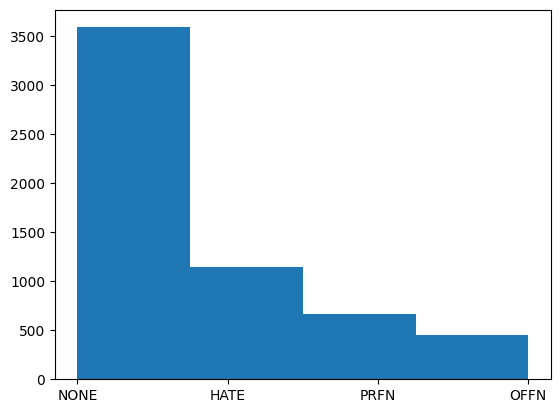

In [53]:
#plot histogram of type of hate speech, with type of hate speech on x axis and number of occurences on y axis
#instead of 1,2,3,4 on x axis, we want NONE, HATE, PRFN, OFFN
#use sns.countplot to plot the histogram
plt.hist(df['type_of_hate_speech'], bins=4)
plt.xticks([1,2,3,4], ['NONE', 'HATE', 'PRFN', 'OFFN'])
plt.show()



**Preprocessing: Tokenize sentences, Change to lower case, Correct spelling, Remove numbers, Remove punctuation, Remove stopwords, Normalize (Lemmatize or Lemmatization)**

In [ ]:
!pip install emoji
!pip install demoji

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


**Predefined functions for text cleaning**

In [54]:
# We shall clean our text here:

#Text cleaning
import re, string
import emoji
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) #set of stopwords

#Clean emoji
def strip_emoji(text):
    return emoji.demojize(text) #convert emoji to text

#Remove punctuations, links, stopwords, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    text = text.replace('\r', '').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    banned_list= string.punctuation
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    text = [word for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    text =' '.join(word for word in text.split() if len(word) < 14) # remove words longer than 14 characters
    return text


#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the "#" symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#remove contractions
def decontract(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

#Filter special characters such as "&" and "$" present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

#Remove multiple sequential spaces
def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

#Stemming
def stemmer(text):
    tokenized = nltk.word_tokenize(text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])

#Lemmatization 
def lemmatize(text):
    tokenized = nltk.word_tokenize(text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])

#Preprocess function
def preprocess(text):
    text = strip_emoji(text)
    text = decontract(text)
    text = strip_all_entities(text)
    text = clean_hashtags(text)
    text = filter_chars(text)
    text = remove_mult_spaces(text)
    text = stemmer(text)
    return text

In [55]:
texts_cleaned = []
for t in df.text:
    texts_cleaned.append(preprocess(t))

In [56]:
df['text_clean'] = texts_cleaned

**Clean text**

In [57]:
df.head()

,text_id,text,type_of_hate_speech,text_clean
0,hasoc_en_1,#DhoniKeepsTheGlove | WATCH: Sports Minister K...,1,watch sport minist kiren rijiju issu statement...
1,hasoc_en_2,@politico No. We should remember very clearly ...,2,rememb clearli individual1 admit treason mccai...
2,hasoc_en_3,@cricketworldcup Guess who would be the winner...,1,guess would winner cwc19 team get maximum poin...
3,hasoc_en_4,Corbyn is too politically intellectual for #Bo...,1,corbyn polit intellectu ca wait
4,hasoc_en_5,All the best to #TeamIndia for another swimmin...,1,best teamindia anoth swim competit sunday paki...


**Checking for duplicate tweets**

In [58]:
df["text_clean"].duplicated().sum()

209

**The given data has 207 duplicates. We remove them here**

In [59]:
df.drop_duplicates("text_clean", inplace=True)

**Find counts of all sentiments**

In [75]:
df.type_of_hate_speech.value_counts() #1: NONE, 2: HATE, 3: PRFN, 4: OFFN
#replace numbers with names

1    3170
2    1032
3     602
4     403
Name: type_of_hate_speech, dtype: int64

**After removing duplicates, the value counts per sentiment is shown above. </br>


# Checking tweet length

In [90]:
text_len = []
for text in df.text_clean:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [91]:
df['text_len'] = text_len
#print range of text length
print('Text length range: ', min(df.text_len), '-', max(df.text_len))

Text length range:  4 - 48


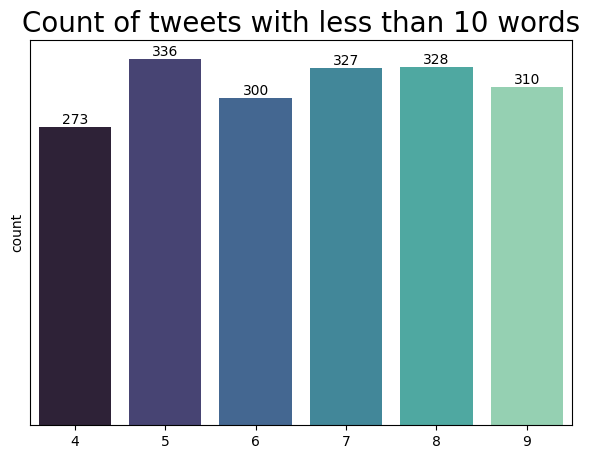

In [92]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df[df['text_len']<10], palette='mako')
plt.title('Count of tweets with less than 10 words', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [93]:
# checking long tweets
df.sort_values(by=['text_len'], ascending=False)

,text_id,text,type_of_hate_speech,text_clean,text_len
1228,hasoc_en_1229,#ShameOnICC If all remaining get washed : ...,1,shameonicc remain get wash nz 12 ind 11 eng 10...,48
162,hasoc_en_163,If all remaining get washed : NZ - 12 Ind -...,1,remain get wash nz 12 ind 11 eng 10 au 10 wi 9...,48
42,hasoc_en_43,Now if all remaining matches will get washed ...,1,remain match get wash nz 12 ind 11 eng 10 au 1...,47
5644,hasoc_en_5645,If all remaining get washed : NZ - 12 Ind -...,2,remain get wash nz 12 ind 11 eng 10 au 10 wi 9...,47
3524,hasoc_en_3525,10 years 09 years 08 years 07 years 06...,1,10 year 09 year 08 year 07 year 06 year 05 yea...,41
...,...,...,...,...,...
3320,hasoc_en_3321,@cabodude @PalmerReport Quack Quack Quack #...,1,quack quack quack fucktrump,4
301,hasoc_en_302,@thehill Nope nope nope not a chance #TrumpsWo...,1,nope nope nope chanc,4
4578,hasoc_en_4579,@RubikaLiyaquat It's really shameful @RubikaLi...,1,realli shame rapist hang,4
1606,hasoc_en_1607,@herman_maureen @funder @1CraftyWitch @PenceCo...,1,thank mo fucktrump enough,4


# Creating a word cloud

In [94]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt #to display our wordcloud
from PIL import Image #to load our image
import numpy as np #to get the color of our image
%matplotlib inline

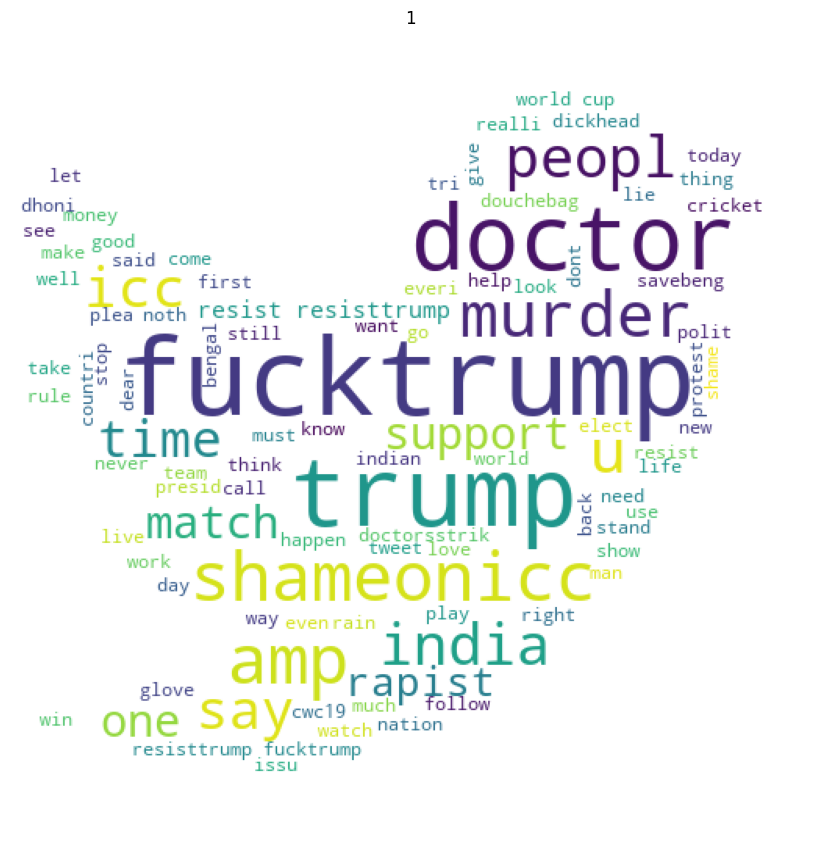

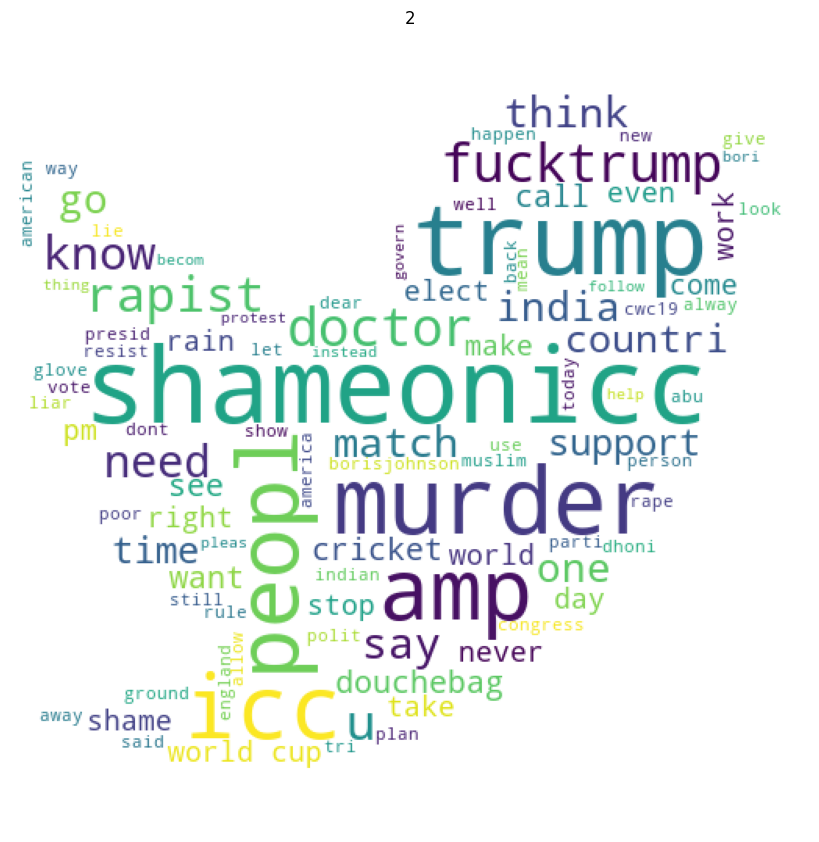

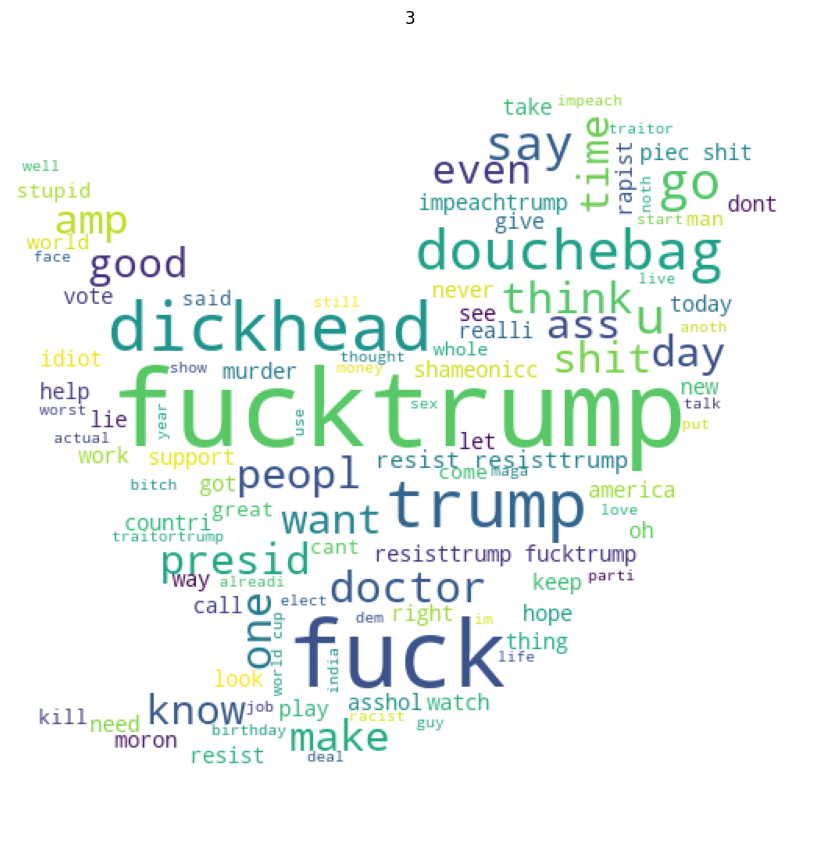

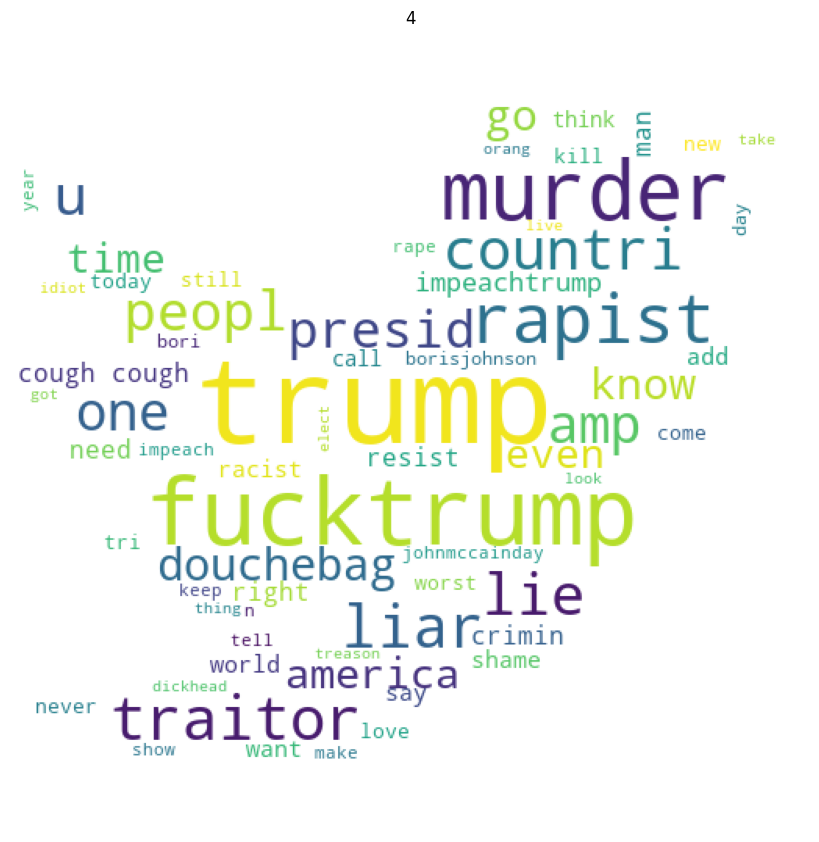

In [95]:
#@title
from sklearn.preprocessing import LabelEncoder

lenc = LabelEncoder()
df.sentiment = lenc.fit_transform(df.type_of_hate_speech)

#Gotta invert the mask
custom_mask = np.array(Image.open(r'C:\Users\yashk\Downloads\twitter.png'))
custom_mask=np.invert(custom_mask)


for c in range(len(lenc.classes_)):
    string = ""
    for i in df[df.sentiment == c].text_clean.values:
        string = string + " " + i.strip()

 
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                mask = custom_mask,
                min_font_size = 10).generate(string)
 
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(lenc.classes_[c])
    plt.show()
    del string

# Turning text into numbers

In [96]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline


tfidf = TfidfTransformer()
clf = CountVectorizer()

X_cv =  clf.fit_transform(df['text_clean'])

tf_transformer = TfidfTransformer(use_idf=True).fit(X_cv)
X_tf = tf_transformer.transform(X_cv)

In [97]:
X_tf

<5207x10710 sparse matrix of type '<class 'numpy.float64'>'
	with 64165 stored elements in Compressed Sparse Row format>

# Train test split

In [98]:
from sklearn.model_selection import train_test_split
# train and test
# We do stratify, to ensure that almost equal number of values come from each type_of_hate_speech 
X_train, X_test, y_train, y_test = train_test_split(X_tf, df['type_of_hate_speech'], test_size=0.20, stratify=df['type_of_hate_speech'], random_state=42)

In [99]:
y_train.value_counts()

1    2536
2     825
3     482
4     322
Name: type_of_hate_speech, dtype: int64

**after checking the training set, there are imbalance of data and it may cause a bias in training the model. Oversampling using SMOTE will be used to balance the train dataset.**

# SMOTE

In [102]:
from imblearn.over_sampling import SMOTE
vc = y_train.value_counts()
while (vc[1] != vc[4]) or (vc[1] !=  vc[2]) or (vc[1] !=  vc[3]):
    smote = SMOTE(sampling_strategy='minority')
    X_train, y_train = smote.fit_resample(X_train, y_train)
    vc = y_train.value_counts()

y_train.value_counts()

1    2536
3    2536
4    2536
2    2536
Name: type_of_hate_speech, dtype: int64

**Now the training set is balanced and ready to be feed into the ml model.**

# Model Training

## Naive Bayes

In [103]:
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)

MultinomialNB()

## K Nearest Neighbor

In [104]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

## Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

## Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# train a Logistic Regression Model
lr_clf = LogisticRegression(max_iter = 1000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# SVM

In [107]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

SVC(kernel='linear')

# Model Evaluation

## **Classification Report**

In [129]:
from sklearn.metrics import classification_report
nb_pred = nb_clf.predict(X_test)
print('Classification Report for Naive Bayes:\n',classification_report(y_test, nb_pred, target_names=['NONE', 'HATE', 'PRFN', 'OFFN']))

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

        NONE       0.78      0.39      0.52       634
        HATE       0.27      0.38      0.32       207
        PRFN       0.32      0.62      0.42       120
        OFFN       0.16      0.41      0.23        81

    accuracy                           0.42      1042
   macro avg       0.38      0.45      0.37      1042
weighted avg       0.58      0.42      0.45      1042



In [130]:
knn_pred = knn_clf.predict(X_test)
print('Classification Report for KNN:\n',classification_report(y_test, knn_pred, target_names=['NONE', 'HATE', 'PRFN', 'OFFN']))

Classification Report for KNN:
               precision    recall  f1-score   support

        NONE       0.76      0.03      0.07       634
        HATE       0.22      0.45      0.30       207
        PRFN       0.25      0.68      0.37       120
        OFFN       0.14      0.47      0.21        81

    accuracy                           0.22      1042
   macro avg       0.34      0.41      0.24      1042
weighted avg       0.55      0.22      0.16      1042



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [131]:
rf_pred = rf_clf.predict(X_test)
print('Classification Report for Random Forest:\n',classification_report(y_test, rf_pred, target_names=['NONE', 'HATE', 'PRFN', 'OFFN']))

Classification Report for Random Forest:
               precision    recall  f1-score   support

        NONE       0.64      0.93      0.76       634
        HATE       0.23      0.04      0.07       207
        PRFN       0.62      0.42      0.50       120
        OFFN       0.40      0.07      0.12        81

    accuracy                           0.63      1042
   macro avg       0.47      0.36      0.36      1042
weighted avg       0.54      0.63      0.54      1042



In [132]:
lr_pred = lr_clf.predict(X_test)
print('Classification Report for Logistic Regression:\n',classification_report(y_test, lr_pred, target_names=['NONE', 'HATE', 'PRFN', 'OFFN']))

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

        NONE       0.71      0.70      0.71       634
        HATE       0.30      0.29      0.29       207
        PRFN       0.51      0.56      0.53       120
        OFFN       0.23      0.25      0.24        81

    accuracy                           0.57      1042
   macro avg       0.44      0.45      0.44      1042
weighted avg       0.57      0.57      0.57      1042



In [133]:
svm_pred = svm_clf.predict(X_test)
print('Classification Report for SVM:\n',classification_report(y_test, svm_pred, target_names=['NONE', 'HATE', 'PRFN', 'OFFN']))

Classification Report for SVM:
               precision    recall  f1-score   support

        NONE       0.70      0.72      0.71       634
        HATE       0.29      0.30      0.30       207
        PRFN       0.53      0.52      0.52       120
        OFFN       0.25      0.17      0.20        81

    accuracy                           0.57      1042
   macro avg       0.44      0.43      0.43      1042
weighted avg       0.56      0.57      0.57      1042



## Confusion Matrix

In [134]:
#@title
from sklearn.metrics import confusion_matrix 
# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

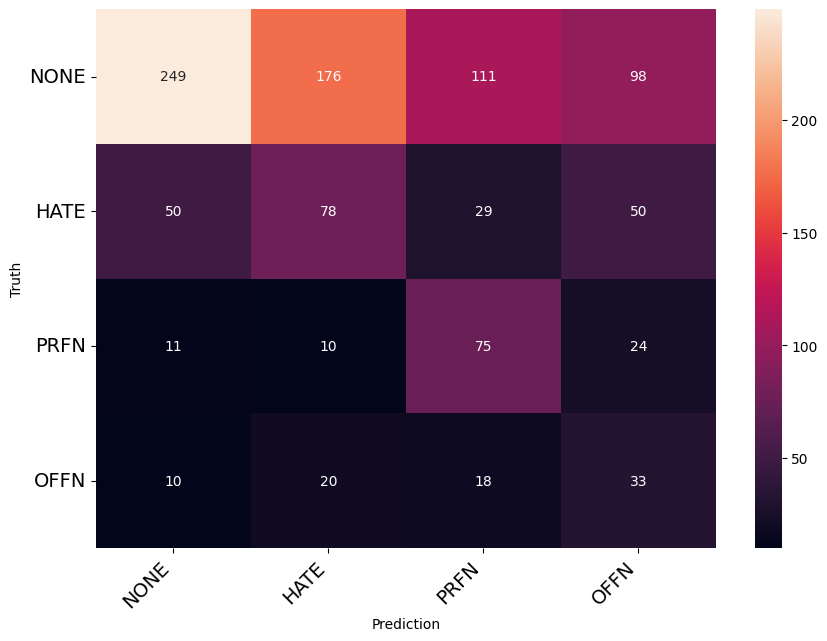

In [135]:
# Naive Bayes
cm = confusion_matrix(y_test,nb_pred)
print_confusion_matrix(cm,['NONE', 'HATE', 'PRFN', 'OFFN'])

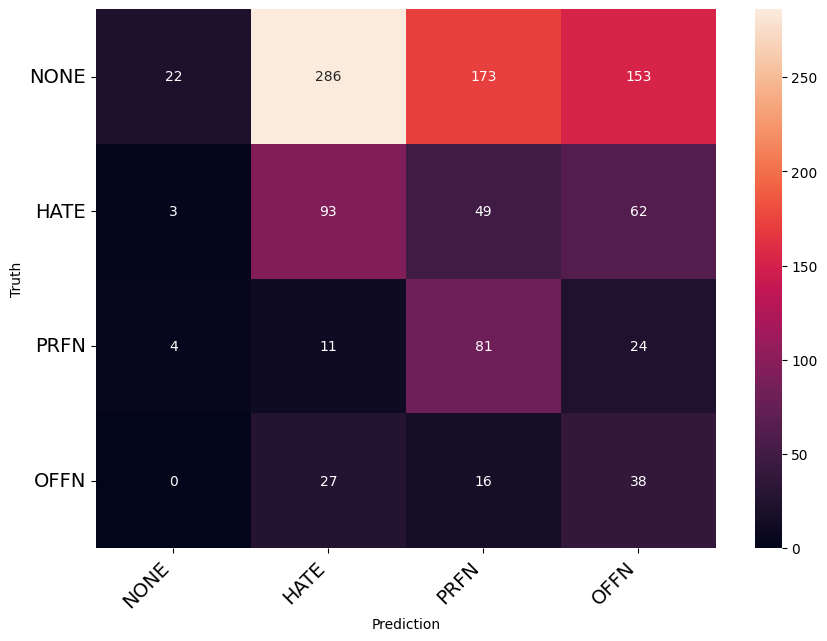

In [136]:
# K Nearest Neighbor
cm = confusion_matrix(y_test,knn_pred)
print_confusion_matrix(cm,['NONE', 'HATE', 'PRFN', 'OFFN'])

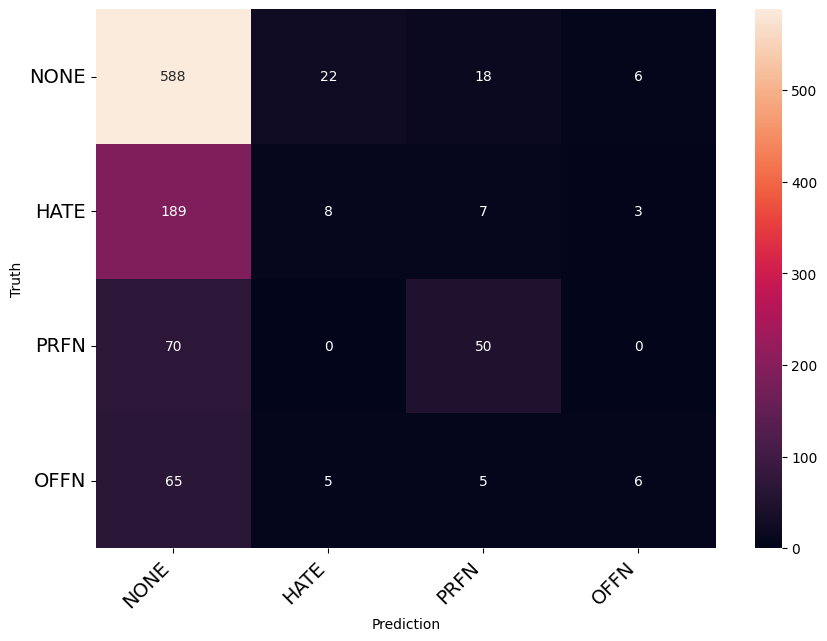

In [137]:
# Random Forest
cm = confusion_matrix(y_test,rf_pred)
print_confusion_matrix(cm,['NONE', 'HATE', 'PRFN', 'OFFN'])

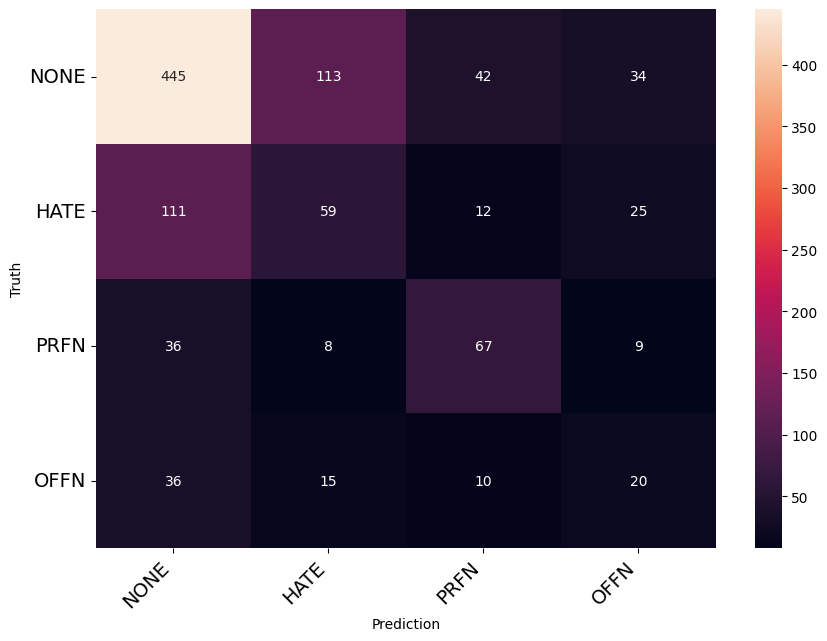

In [138]:
# Logistic Regression
cm = confusion_matrix(y_test,lr_pred)
print_confusion_matrix(cm,['NONE', 'HATE', 'PRFN', 'OFFN'])

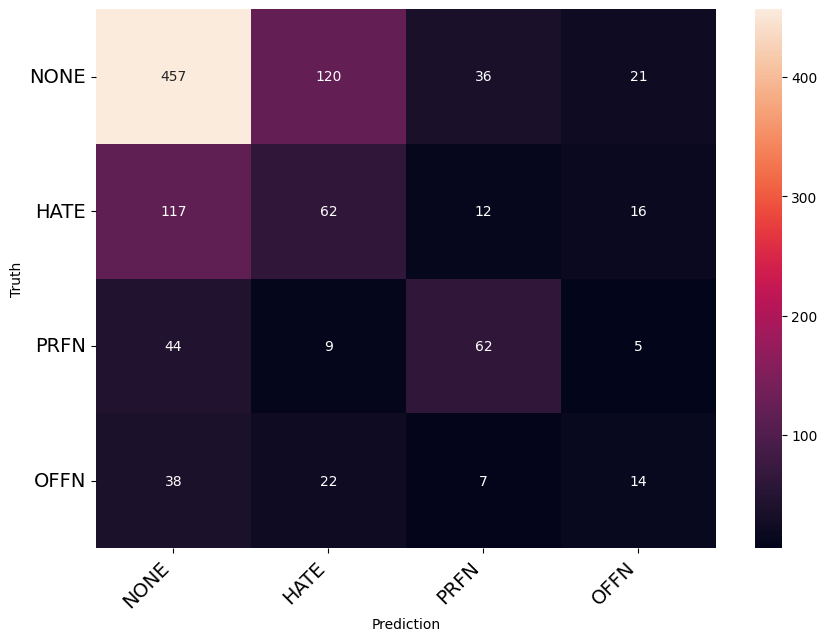

In [139]:
# SVM
cm = confusion_matrix(y_test,svm_pred)
print_confusion_matrix(cm,['NONE', 'HATE', 'PRFN', 'OFFN'])